# 정렬 기반 알고리즘 프로토타입

In [141]:
# 테스트할 모의 데이터 생성
import numpy as np
import pandas as pd

# 랜덤 시드 고정
np.random.seed(21354)

# 모집단 평균과 표준편차 설정
mu_x1, sigma_x1 = 70, 10
mu_x2, sigma_x2 = 50, 15

# 100명의 index, name 생성
index = np.arange(1, 101)
names = [f"Person_{i:03d}" for i in index]

# 정규분포 기반 점수 생성 (정규화된 분포를 가정)
x1 = np.round(np.random.normal(mu_x1, sigma_x1, size=100),2)
x2 = np.round(np.random.normal(mu_x2, sigma_x2, size=100),2)

# 남자, 여자 구분을 위한 성별 데이터 생성
sex = np.random.choice([1,2], size=100, p=[0.4, 0.6])  # 1: 남자, 2: 여자

# 상담 유무 구분을 위한 데이터 생성
counseling = np.random.choice([0,1], size=100, p=[0.8, 0.2])  # 0: 상담 없음, 1: 상담 있음

# 데이터프레임 구성
df = pd.DataFrame({
    'index': index,
    'name': names,
    'sex' : sex,
    'x1': x1,
    'x2': x2,
    'counseling': counseling
})

In [142]:
from collections import defaultdict

df_sorted_first = df.sort_values(by=['x1', 'x2'], ascending=False).reset_index(drop=True)
df_sorted_first['group'] = None
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1  None
1      32  Person_032    1  89.82  65.40           1  None
2      96  Person_096    2  89.05  36.65           1  None
3      26  Person_026    2  88.31  58.00           1  None
4      66  Person_066    1  84.77  26.53           1  None
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0  None
96     88  Person_088    2  52.68  66.29           0  None
97     36  Person_036    2  50.89  46.98           0  None
98     92  Person_092    1  50.20  48.03           0  None
99     83  Person_083    2  44.98  63.72           0  None

[100 rows x 7 columns]


### 우선 범주형 고려 안하고 연속형으로 진행 했을 때

In [109]:
# round-robin 방식으로 그룹 통계 생성
group_count = 4
for i, idx in enumerate(df_sorted.index):
    group = i % group_count # 나머지로 그룹 번호 결정 (0, 1, 2, 3)
    df_sorted.at[idx, 'group'] = group
print(df_sorted)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     0
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     3
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


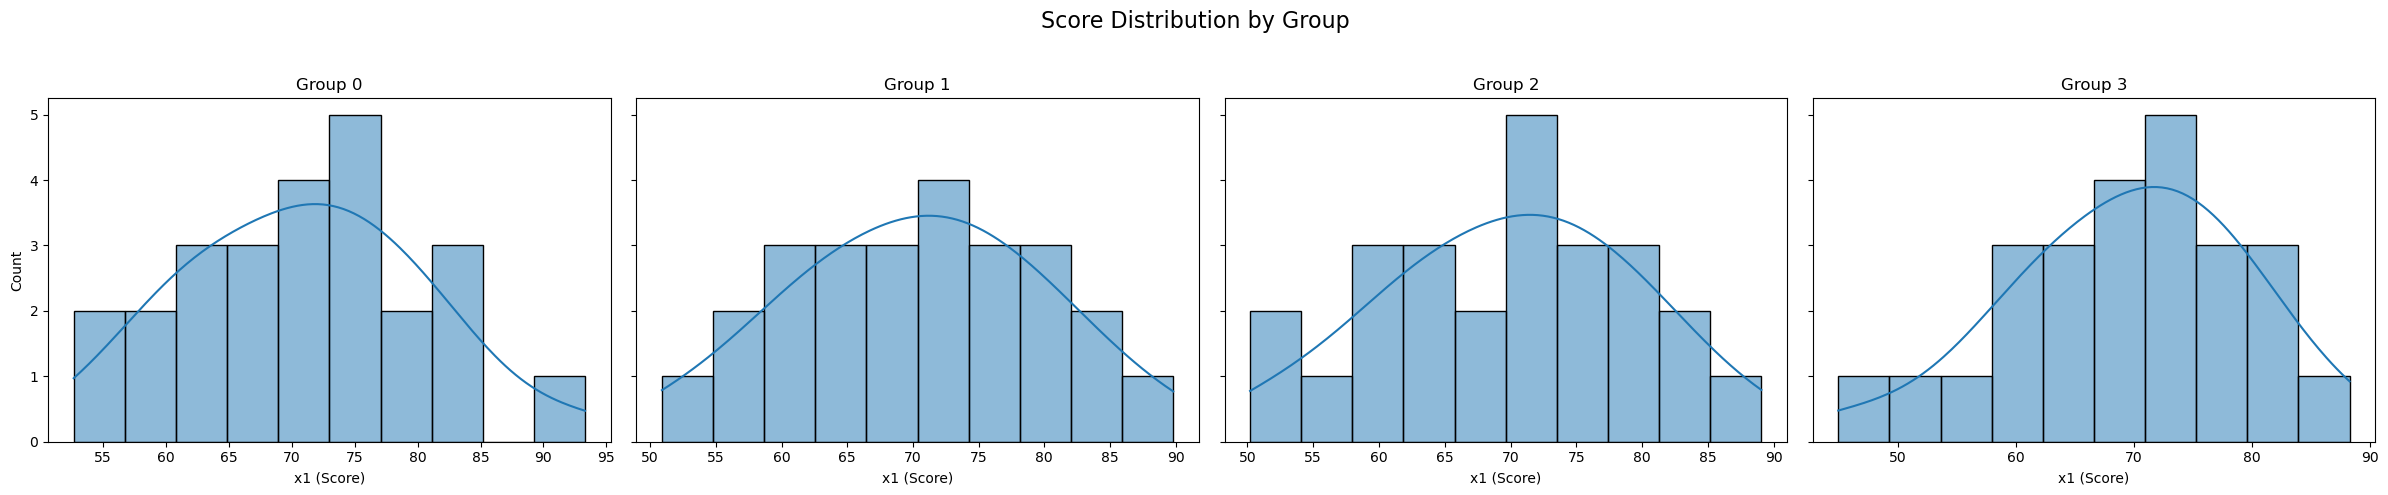

In [110]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted[df_sorted['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [111]:
# serpentine 방식으로 그룹 통계 생성
group_count = 4
direction = 1
group = 0
for i, idx in enumerate(df_sorted.index):
    df_sorted.at[idx, 'group'] = group
    group += direction
    if group == group_count or group < 0:
        direction *= -1
        group += direction
print(df_sorted)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     3
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     0
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


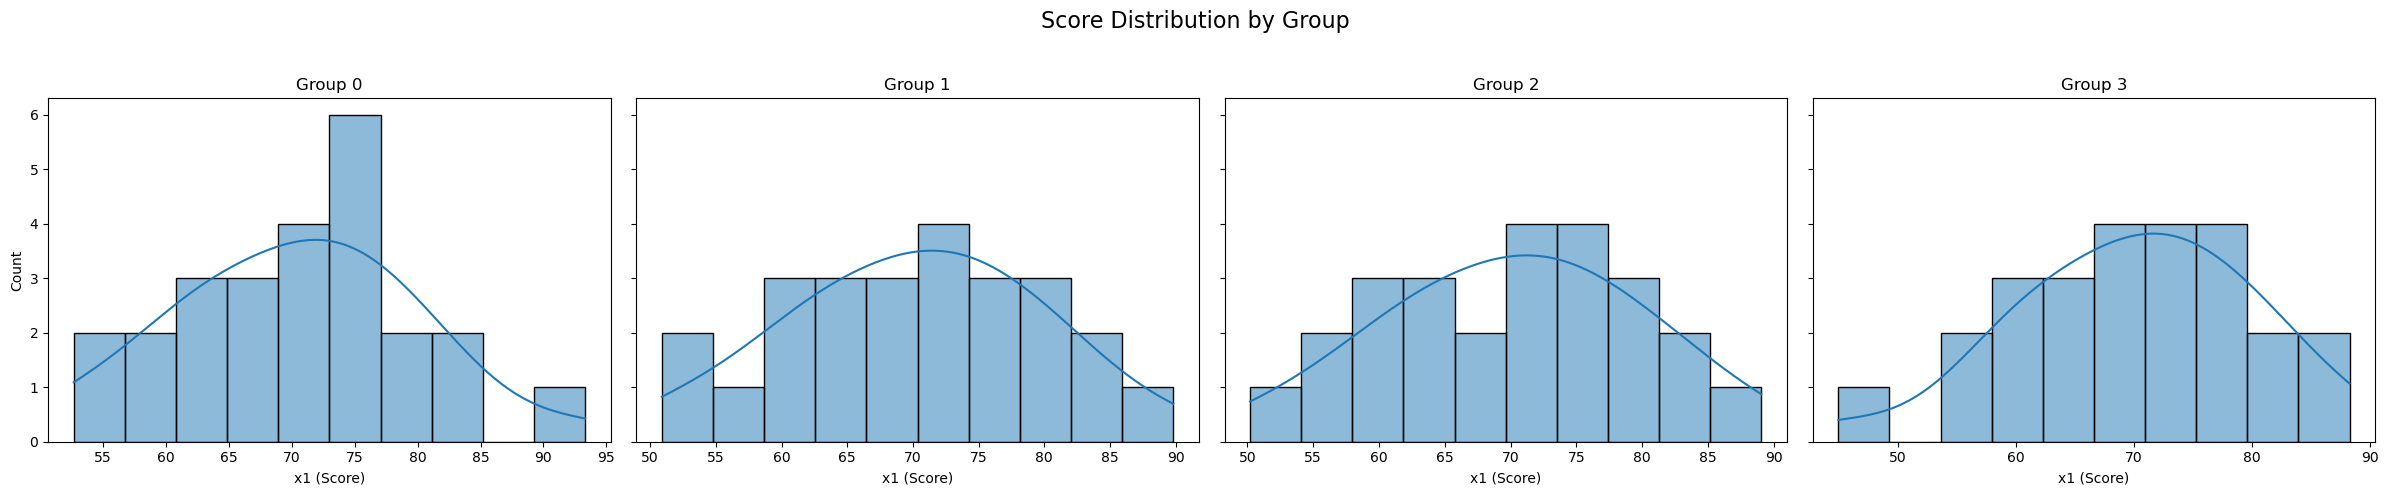

In [112]:
# 그룹별 시각화
# 고유 그룹 수
group_labels = sorted(df_sorted['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted[df_sorted['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [113]:
# 중앙에서 바깥쪽으로 (center-outward) 방식으로 그룹 통계 생성
import numpy as np

indices = list(df_sorted.index)
center_first = sorted(indices, key=lambda i: abs(i - len(df_sorted) // 2))

for i, idx in enumerate(center_first):
    group = i % group_count
    df_sorted.at[idx, 'group'] = group
print(df_sorted)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     3
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     3
3      26  Person_026    2  88.31  58.00           1     1
4      66  Person_066    1  84.77  26.53           1     3
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     2
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     2
98     92  Person_092    1  50.20  48.03           0     0
99     83  Person_083    2  44.98  63.72           0     2

[100 rows x 7 columns]


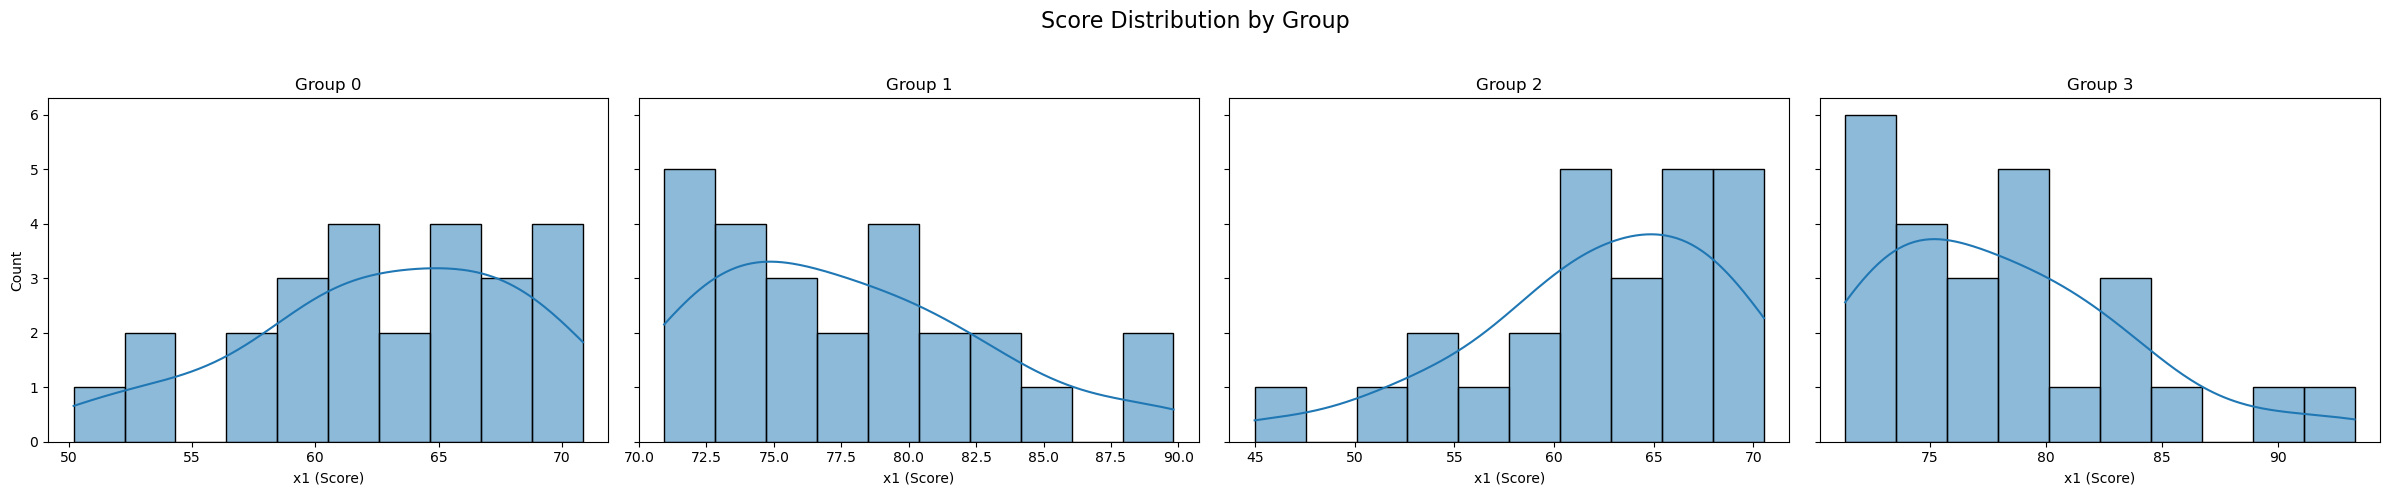

In [114]:
# 그룹별 시각화
group_labels = sorted(df_sorted['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted[df_sorted['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# ! center-outward 방식은 좋아보이지 않음.

In [118]:
from collections import defaultdict

group_count = 4
category_columns = ['sex', 'counseling']
ideal_group_stats = defaultdict(lambda: defaultdict(float))

# 전체 빈도 계산
for _, row in df.iterrows():
    for col in category_columns:
        value = row[col]
        ideal_group_stats[col][value] += 1

# 이상적인 그룹 분배 계산
for category, value_counts in ideal_group_stats.items():
    print(f"[{category}]")  # 디버깅 출력
    for val, count in value_counts.items():
        if group_count == 0:
            raise ValueError("group_count must be greater than 0.")
        normalized = count / group_count
        ideal_group_stats[category][val] = normalized
        print(f"  {val}: {normalized:.2f}")

[sex]
  2: 16.25
  1: 8.75
[counseling]
  0: 18.50
  1: 6.50


In [133]:
# round-robin 방식으로 그룹 통계 생성
group_count = 4
for i, idx in enumerate(df_sorted.index):
    group = i % group_count # 나머지로 그룹 번호 결정 (0, 1, 2, 3)
    df_sorted.at[idx, 'group'] = group
print(df_sorted)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     0
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     3
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


In [143]:
group_count = 4
category_columns = ['sex', 'counseling']
group_stats = [defaultdict(lambda: defaultdict(int)) for _ in range(group_count)]

# ! 고려해야하는 것이 각 그룹, 범주명, 범주의 값 개수
for idx, row in df_sorted_first.iterrows(): # 각 행에 대해
    group_deviation_list = [] # 각 그룹의 편차를 저장할 리스트 초기화

    for g in range(group_count): # 각 그룹에 대해
        deviation_list = []

        for col in category_columns: # 각 범주형 변수에 대해
            val = row[col] # 현재 행의 범주형 변수의 값 성별이면 남자인지 여자인지?
            ideal_count = ideal_group_stats[col][val] # 이상적인 그룹 통계에서 해당 값의 이상적인 개수
            current_count = group_stats[g][col][val] # 현재 그룹 통계에서 해당 값의 개수
            projected_count = current_count + 1 # 해당 행이 해당 그룹에 추가되었을 때의 예상 개수

            # 편차 계산
            deviation = abs(projected_count - ideal_count) # 해당 행의 해당 값의 이상적인 개수와 현재 개수의 차이
            deviation_list.append(deviation) # 해당 범주형 변수의 편차를 리스트에 추가

        max_deviation = max(deviation_list) # 해당 그룹의 최대 편차
        group_deviation_list.append(max_deviation)

    # 가장 편차가 작은 그룹 찾기
    min_deviation = min(group_deviation_list) # 최소 편차
    best_group = group_deviation_list.index(min_deviation) # 최소 편차의 그룹 번호
    df_sorted_first.at[idx, 'group'] = best_group # 해당 행의 그룹 번호를 설정

    # group_stats 갱신
    for col in category_columns:
        val = row[col]
        group_stats[best_group][col][val] += 1

In [144]:
df_sorted_first

,index,name,sex,x1,x2,counseling,group
0,18,Person_018,2,93.30,45.40,1,0
1,32,Person_032,1,89.82,65.40,1,0
2,96,Person_096,2,89.05,36.65,1,0
3,26,Person_026,2,88.31,58.00,1,0
4,66,Person_066,1,84.77,26.53,1,0
...,...,...,...,...,...,...,...
95,19,Person_019,2,52.94,70.18,0,1
96,88,Person_088,2,52.68,66.29,0,2
97,36,Person_036,2,50.89,46.98,0,2
98,92,Person_092,1,50.20,48.03,0,2


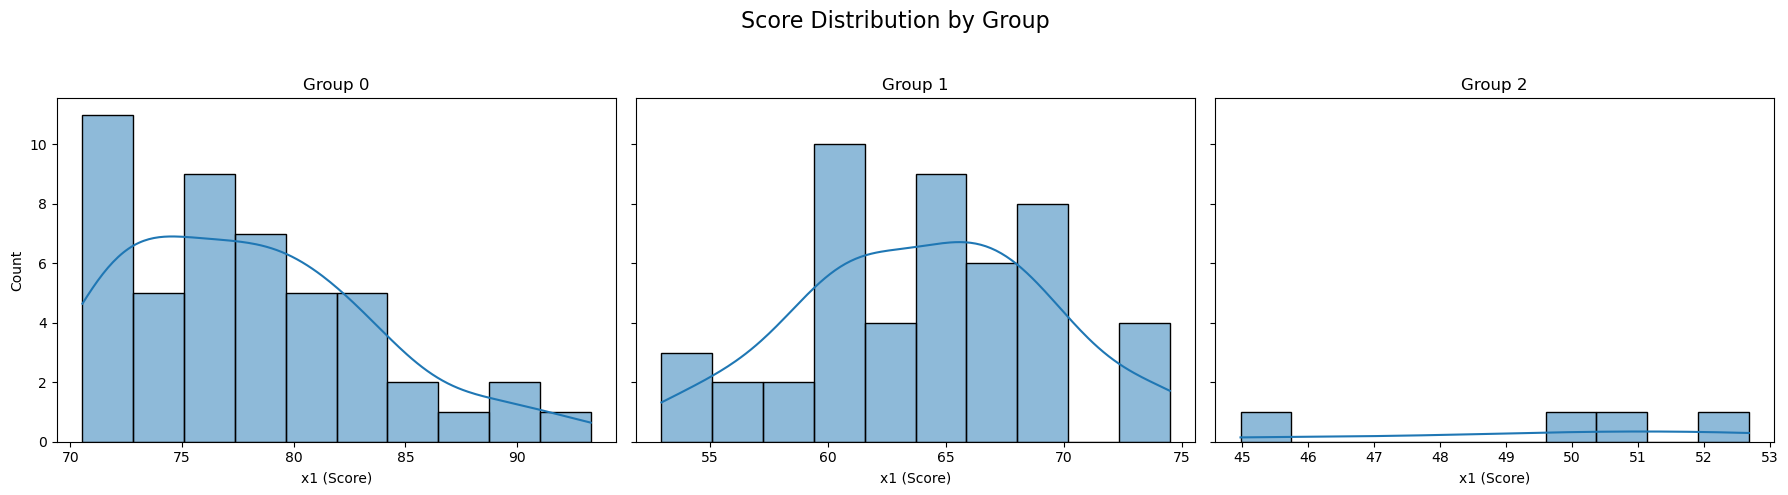

In [146]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted_first['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted_first[df_sorted_first['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()